#NBA Player Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests


#CLUSTERING

Importing the dataset.

In [ ]:
seasondata = pd.read_csv(r"https://raw.githubusercontent.com/joshiarnav/ds4400project/main/ML_Data_2021Season.csv")

In [ ]:
seasondata
data = seasondata._get_numeric_data().dropna(axis = 1)

data

,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
0,78,34.0,70.8,25.5,7.2,158,0.816,802,0.516,599,0.402,0.554,0.571,21.5,3.8,6.0,2.4,11.0,1.06,0.60,1.46,6.8,109.9,109.3
1,25,29.4,61.3,23.9,16.5,105,0.629,181,0.475,112,0.375,0.509,0.537,14.6,6.6,11.7,4.2,23.0,0.64,0.80,2.68,10.1,102.8,109.9
2,66,17.8,37.1,19.5,12.3,83,0.819,254,0.406,182,0.368,0.467,0.503,7.2,1.3,4.1,1.9,14.1,0.70,0.20,1.00,5.9,98.6,110.7
3,46,14.5,30.3,13.7,10.8,28,0.786,70,0.543,108,0.370,0.551,0.573,4.7,2.8,10.6,0.5,4.6,0.33,0.20,0.50,5.2,112.3,102.6
4,24,14.8,30.8,19.0,12.6,37,0.757,73,0.534,43,0.419,0.569,0.605,6.7,2.6,9.9,0.8,7.3,0.42,0.38,0.79,6.5,110.4,104.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,59,18.4,38.3,14.3,12.3,53,0.642,234,0.620,65,0.338,0.595,0.605,6.6,4.3,12.5,1.3,9.4,0.75,0.56,0.76,7.2,117.9,102.6
473,8,12.1,25.1,17.9,0.0,7,1.000,17,0.353,19,0.316,0.417,0.473,4.6,1.5,7.0,2.1,23.6,0.50,0.25,0.00,8.1,121.7,106.8
474,50,14.5,30.1,12.7,9.0,29,0.828,90,0.478,90,0.400,0.539,0.565,4.4,3.2,12.0,0.8,7.7,0.52,0.40,0.38,6.2,116.4,107.6
475,58,35.1,73.0,31.1,13.9,298,0.849,646,0.571,477,0.419,0.596,0.634,27.4,5.0,7.9,4.9,23.4,0.79,0.47,3.50,10.0,114.7,109.5


Groups the 477 players into 8 clusters (random_state = 40), and stores the labels of all the players into a variable.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

model = KMeans(n_clusters = 8, random_state = 40)

model.fit(data)
labels = model.labels_


PCA is done for dimensionality reduction. The data is reduced to 2 dimensions and is plotted and color coded based on what clsuter the player is in.

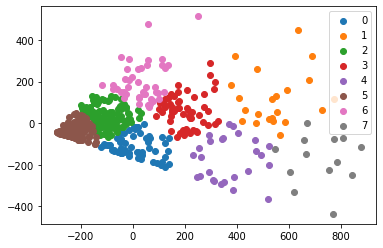

In [ ]:
Two_D_PCA = PCA(2)
to_plot = Two_D_PCA.fit_transform(data)
##plt.scatter(x=to_plot[:,0], y=to_plot[:,1], c=labels)

cluster_labels = np.unique(labels)

for cluster in cluster_labels:
    plt.scatter(x = to_plot[labels == cluster, 0], y = to_plot[labels == cluster, 1], label = cluster)
    
plt.legend()
plt.show()

The method get_player_cluster returns the cluster number that the given player is in. We mainly made this method to internally check if our clusters were accurate — to see if players were in the same or different cluster as other players we expected them to be.

In [ ]:
def get_player_cluster(name):
    for x in range(0,477):
        if (seasondata.loc[x, 'FULL NAME'] == name):
            return labels[x]
    print("name not found") 



This method returns all the players in the given cluster number.

In [ ]:
def get_players_in_cluster_n(num):
    dudes = np.array([])
    for x in range(0,477):
        if (labels[x] == num):
            dudes = np.append(dudes, seasondata.loc[x,'FULL NAME'])
    return dudes
    

This method returns the average statistics of the given cluster number.

In [ ]:
def get_average_stats_for_cluster(num):
    list_of_dudes = get_players_in_cluster_n(num)
    list_of_row_titles = ['GP', 'MPG', 'MIN%', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG']
    avg_stats = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for dude in list_of_dudes:
        for x in range(0,477):
            if (dude == seasondata.loc[x,'FULL NAME']):
                for i in range(0, len(list_of_row_titles)):
                    avg_stats[i] = avg_stats[i] + seasondata.loc[x,list_of_row_titles[i]]
                    
    #printed_stats = [np.array([])]
    #for i in range(0, len(list_of_row_titles)):
    #    printed_stats = np.append(printed_stats, [list_of_row_titles[i], (avg_stats[i]/len(list_of_dudes))])
    
    printed_stats_2 = {}
    for i in range(0, len(list_of_row_titles)):
        printed_stats_2[list_of_row_titles[i]] = (avg_stats[i]/len(list_of_dudes))
    return printed_stats_2

In [ ]:
def get_average_stats_all_clusters():
    all_stats = {}
    for i in range (0, 8):
        all_stats['Cluster ' + str(i)] = get_average_stats_for_cluster(i)
    return all_stats

Cluster 0 Info:

In [ ]:
get_players_in_cluster_n(0)

array(['Alex Len', 'Andre Drummond', 'Bismack Biyombo', 'Brandon Clarke',
       'Bruce Brown', 'Cody Zeller', 'DeAndre Jordan', 'Delon Wright',
       'Derrick Favors', 'Derrick Rose', 'Draymond Green', 'Drew Eubanks',
       'Dwight Howard', 'Dwight Powell', 'Eric Paschall',
       'Hamidou Diallo', 'Hassan Whiteside', 'Isaiah Roby',
       'Isaiah Stewart', 'Ish Smith', 'Ivica Zubac', 'Jakob Poeltl',
       'James Wiseman', 'Jarred Vanderbilt', 'Jarrett Allen',
       'JaVale McGee', 'Jaxson Hayes', 'Jusuf Nurkic', 'Kenrich Williams',
       'Kenyon Martin Jr.', 'Kevon Looney', 'Khem Birch', 'Lou Williams',
       'Marvin Bagley III', 'Mason Plumlee', 'Michael Carter-Williams',
       'Mitchell Robinson', 'Monte Morris', 'Moses Brown', 'Nerlens Noel',
       'Patrick Williams', 'Paul Millsap', 'Precious Achiuwa',
       'Raul Neto', 'Robert Williams III', 'Robin Lopez', 'Serge Ibaka',
       'Steven Adams', 'T.J. McConnell', 'Talen Horton-Tucker',
       'Terance Mann', 'Tristan Tho

In [ ]:
get_average_stats_for_cluster(0)

{'2P%': 0.5912586206896552,
 '2PA': 284.7931034482759,
 '3P%': 0.24315517241379309,
 '3PA': 49.741379310344826,
 'APG': 2.003448275862069,
 'AST%': 12.787931034482757,
 'BPG': 0.79448275862069,
 'DRTG': 107.53275862068966,
 'FT%': 0.7055862068965518,
 'FTA': 102.43103448275862,
 'GP': 53.775862068965516,
 'MIN%': 46.524137931034474,
 'MPG': 22.334482758620684,
 'ORTG': 120.6603448275862,
 'PPG': 8.882758620689659,
 'RPG': 5.894827586206898,
 'SPG': 0.7244827586206894,
 'TO%': 14.377586206896547,
 'TOPG': 1.2317241379310344,
 'TRB%': 14.993103448275864,
 'TS%': 0.6082931034482759,
 'USG%': 17.839655172413792,
 'VI': 8.017241379310347,
 'eFG%': 0.5840172413793102}

Cluster 1 Info:

In [ ]:
get_players_in_cluster_n(1)

array(['Klay Thompson', 'Andrew Wiggins', 'Anthony Edwards',
       'Bojan Bogdanovic', 'Brandon Ingram', 'Damian Lillard',
       'Dillon Brooks', 'Donovan Mitchell', 'Jaylen Brown',
       'Jayson Tatum', 'Jerami Grant', 'Jordan Clarkson',
       'Karl-Anthony Towns', 'Khris Middleton', 'Kyrie Irving',
       'Luka Doncic', 'Malcolm Brogdon', 'Paul George', 'RJ Barrett',
       'Stephen Curry', 'Terry Rozier', 'Zach LaVine'], dtype='<U32')

In [ ]:
get_average_stats_for_cluster(1)

{'2P%': 0.5138181818181818,
 '2PA': 652.2272727272727,
 '3P%': 0.3848181818181819,
 '3PA': 465.3181818181818,
 'APG': 4.363636363636363,
 'AST%': 21.08636363636364,
 'BPG': 0.47272727272727283,
 'DRTG': 108.6090909090909,
 'FT%': 0.8405454545454546,
 'FTA': 278.8636363636364,
 'GP': 63.40909090909091,
 'MIN%': 69.85000000000001,
 'MPG': 33.53181818181818,
 'ORTG': 112.5227272727273,
 'PPG': 22.999999999999996,
 'RPG': 5.35,
 'SPG': 0.9877272727272726,
 'TO%': 11.090909090909092,
 'TOPG': 2.496363636363636,
 'TRB%': 8.631818181818183,
 'TS%': 0.5803636363636365,
 'USG%': 28.472727272727273,
 'VI': 9.477272727272727,
 'eFG%': 0.5394545454545455}

Cluster 2 Info:

In [ ]:
get_players_in_cluster_n(2)

array(['Aaron Gordon', 'Aaron Holiday', 'Al Horford',
       'Aleksej Pokusevski', 'Alex Caruso', 'Andre Iguodala',
       'Armoni Brooks', 'Aron Baynes', 'Blake Griffin', 'Brandon Goodwin',
       'Caleb Martin', 'Cam Reddish', 'Cameron Payne', 'Chasson Randle',
       'Chuma Okeke', 'Cody Martin', 'Cory Joseph', 'D.J. Augustin',
       'Damion Lee', 'Damyean Dotson', 'Daniel Theis', 'Danuel House Jr.',
       'Dario Saric', 'David Nwaba', "De'Andre Hunter",
       "De'Anthony Melton", 'Dean Wade', "DeAndre' Bembry", 'Deni Avdija',
       'Denzel Valentine', 'Derrick Jones Jr.', 'Devin Vassell',
       'Edmond Sumner', 'Eric Gordon', 'Evan Fournier',
       'Facundo Campazzo', 'Frank Jackson', 'Frank Kaminsky',
       'Gabe Vincent', 'Garrett Temple', 'Garrison Mathews',
       'Gary Harris', 'Goga Bitadze', 'Grant Williams', 'Jaden McDaniels',
       'Jalen McDaniels', 'James Ennis III', 'JaMychal Green',
       'Jaylen Nowell', 'Jeff Teague', 'Jeremy Lamb', 'Jevon Carter',
       'J

In [ ]:
get_average_stats_for_cluster(2)

{'2P%': 0.5197047619047618,
 '2PA': 141.23809523809524,
 '3P%': 0.3572571428571428,
 '3PA': 146.22857142857143,
 'APG': 1.9685714285714286,
 'AST%': 13.200000000000003,
 'BPG': 0.3925714285714285,
 'DRTG': 110.93047619047621,
 'FT%': 0.7844571428571426,
 'FTA': 55.36190476190476,
 'GP': 45.99047619047619,
 'MIN%': 44.740952380952386,
 'MPG': 21.476190476190474,
 'ORTG': 110.68095238095238,
 'PPG': 8.257142857142862,
 'RPG': 3.3752380952380956,
 'SPG': 0.6744761904761905,
 'TO%': 12.300000000000006,
 'TOPG': 1.044190476190476,
 'TRB%': 8.700952380952382,
 'TS%': 0.5587428571428571,
 'USG%': 17.657142857142862,
 'VI': 6.854285714285715,
 'eFG%': 0.5301142857142856}

Cluster 3 Info:

In [ ]:
get_players_in_cluster_n(3)

array(['Bobby Portis', 'Brook Lopez', 'Caris LeVert', 'Carmelo Anthony',
       'Chris Boucher', 'Christian Wood', 'CJ McCollum', 'Coby White',
       'Cole Anthony', "D'Angelo Russell", 'Darius Bazley',
       'Darius Garland', 'Doug McDermott', 'Eric Bledsoe',
       'Fred VanVleet', 'Goran Dragic', 'Gordon Hayward',
       'Harrison Barnes', 'Immanuel Quickley', 'Isaac Okoro',
       "Jae'Sean Tate", 'Jalen Brunson', 'Jamal Murray', 'James Harden',
       'Jeff Green', 'John Wall', 'Josh Jackson', 'Josh Richardson',
       'Jrue Holiday', 'Kelly Oubre Jr.', 'Kemba Walker', 'Kendrick Nunn',
       'Kevin Durant', 'Kevin Huerter', 'Kristaps Porzingis',
       'Kyle Anderson', 'Kyle Kuzma', 'LaMelo Ball', 'Lonnie Walker IV',
       'Luguentz Dort', 'Michael Porter Jr.', 'Mikal Bridges',
       'Mike Conley', 'Miles Bridges', 'Naz Reid', 'Norman Powell',
       'P.J. Washington', 'Reggie Jackson', 'Ricky Rubio', 'Rudy Gay',
       'Shai Gilgeous-Alexander', 'Shake Milton', 'Terrence Ros

In [ ]:
get_average_stats_for_cluster(3)

{'2P%': 0.5148793103448277,
 '2PA': 383.3448275862069,
 '3P%': 0.3729655172413793,
 '3PA': 282.5344827586207,
 'APG': 3.4051724137931028,
 'AST%': 17.410344827586204,
 'BPG': 0.5270689655172414,
 'DRTG': 109.28448275862068,
 'FT%': 0.8059999999999997,
 'FTA': 149.27586206896552,
 'GP': 57.05172413793103,
 'MIN%': 60.82241379310345,
 'MPG': 29.193103448275863,
 'ORTG': 111.70172413793107,
 'PPG': 15.234482758620699,
 'RPG': 4.562068965517242,
 'SPG': 0.8974137931034485,
 'TO%': 11.25344827586207,
 'TOPG': 1.728620689655172,
 'TRB%': 8.575862068965517,
 'TS%': 0.5691724137931033,
 'USG%': 22.26206896551724,
 'VI': 7.989655172413792,
 'eFG%': 0.5349310344827586}

Cluster 4 Info:

In [ ]:
get_players_in_cluster_n(4)

array(['Anthony Davis', 'Bam Adebayo', 'Ben Simmons', 'Chris Paul',
       'Clint Capela', 'Deandre Ayton', 'Dejounte Murray',
       'Dennis Schroder', 'Domantas Sabonis', 'Dwayne Bacon',
       'Elfrid Payton', 'Enes Kanter', 'Jimmy Butler', 'John Collins',
       'Jonas Valanciunas', 'Kawhi Leonard', 'Keldon Johnson',
       'LeBron James', 'Montrezl Harrell', 'Nikola Vucevic',
       'Pascal Siakam', 'Richaun Holmes', 'Rudy Gobert', 'Rui Hachimura',
       'Thaddeus Young', 'Tobias Harris'], dtype='<U32')

In [ ]:
get_average_stats_for_cluster(4)

{'2P%': 0.5607692307692308,
 '2PA': 616.7692307692307,
 '3P%': 0.27611538461538465,
 '3PA': 127.46153846153847,
 'APG': 3.715384615384615,
 'AST%': 18.71153846153846,
 'BPG': 0.7634615384615386,
 'DRTG': 105.05769230769229,
 'FT%': 0.7668076923076925,
 'FTA': 224.84615384615384,
 'GP': 61.07692307692308,
 'MIN%': 63.48076923076923,
 'MPG': 30.473076923076917,
 'ORTG': 117.51923076923079,
 'PPG': 16.78846153846154,
 'RPG': 7.9192307692307695,
 'SPG': 0.9838461538461539,
 'TO%': 11.557692307692308,
 'TOPG': 1.8753846153846148,
 'TRB%': 14.253846153846155,
 'TS%': 0.5916923076923077,
 'USG%': 22.780769230769224,
 'VI': 9.542307692307691,
 'eFG%': 0.5564230769230769}

Cluster 5 Info:

In [ ]:
get_players_in_cluster_n(5)

array(['Aaron Nesmith', 'Abdel Nader', 'Al-Farouq Aminu',
       'Alfonzo McKinnie', 'Alize Johnson', 'Andre Roberson',
       'Anthony Gill', 'Anthony Lamb', 'Austin Rivers', 'Avery Bradley',
       'Ben McLemore', 'Brad Wanamaker', 'Brodric Thomas',
       'Cameron Oliver', 'Cameron Reynolds', 'Carsen Edwards',
       'Cassius Winston', 'Chandler Hutchison', 'Charlie Brown Jr.',
       'Chimezie Metu', 'Chris Chiozza', 'D.J. Augustin', 'D.J. Wilson',
       'Damian Jones', 'Daniel Gafford', 'Daniel Oturu', 'Dante Exum',
       'DaQuan Jeffries', 'Darius Miller', 'DeMarcus Cousins',
       'Dennis Smith Jr.', 'Devon Dotson', 'Dewayne Dedmon', 'Donta Hall',
       'Dylan Windler', "E'Twaun Moore", 'Ed Davis', 'Ersan Ilyasova',
       'Frank Mason', 'Frank Ntilikina', 'Freddie Gillespie',
       'Gabriel Deck', 'Gary Clark', 'George Hill', 'Glenn Robinson III',
       'Gorgui Dieng', 'Harry Giles III', 'Iman Shumpert', 'Isaac Bonga',
       'Isaiah Hartenstein', 'Isaiah Joe', 'Isaiah Th

In [ ]:
get_average_stats_for_cluster(5)

{'2P%': 0.5328079470198674,
 '2PA': 57.788079470198674,
 '3P%': 0.29833774834437093,
 '3PA': 37.90728476821192,
 'APG': 1.152980132450332,
 'AST%': 11.340397350993376,
 'BPG': 0.3451655629139074,
 'DRTG': 112.04701986754964,
 'FT%': 0.7583576158940397,
 'FTA': 24.172185430463575,
 'GP': 25.165562913907284,
 'MIN%': 30.189403973509936,
 'MPG': 14.495364238410582,
 'ORTG': 113.90596026490068,
 'PPG': 5.273509933774832,
 'RPG': 2.7066225165562914,
 'SPG': 0.4535761589403976,
 'TO%': 13.52450331125828,
 'TOPG': 0.690662251655629,
 'TRB%': 10.796688741721857,
 'TS%': 0.5677947019867546,
 'USG%': 17.501324503311253,
 'VI': 6.731125827814572,
 'eFG%': 0.5350596026490063}

Cluster 6 Info:

In [ ]:
get_players_in_cluster_n(6)

array(['Alec Burks', 'Anfernee Simons', 'Bogdan Bogdanovic',
       'Bryn Forbes', 'Buddy Hield', 'Cameron Johnson', 'Cedi Osman',
       'Danilo Gallinari', 'Danny Green', 'Davis Bertans',
       'Derrick White', 'Desmond Bane', "Devonte' Graham",
       'Donte DiVincenzo', 'Dorian Finney-Smith', 'Duncan Robinson',
       'Furkan Korkmaz', 'Gary Trent Jr.', 'Georges Niang',
       'Grayson Allen', 'Jae Crowder', 'Joe Harris', 'Joe Ingles',
       'Jordan Poole', 'Justin Holiday', 'Kentavious Caldwell-Pope',
       'Kyle Lowry', 'Landry Shamet', 'Lauri Markkanen', 'Lonzo Ball',
       'Malik Beasley', 'Marcus Morris Sr.', 'Marcus Smart',
       'Nicolas Batum', 'OG Anunoby', 'Pat Connaughton', 'Patty Mills',
       'Payton Pritchard', 'Reggie Bullock', 'Robert Covington',
       "Royce O'Neale", 'Saddiq Bey', 'Seth Curry', 'Wayne Ellington'],
      dtype='<U32')

In [ ]:
get_average_stats_for_cluster(6)

{'2P%': 0.4981818181818181,
 '2PA': 187.9318181818182,
 '3P%': 0.3980681818181818,
 '3PA': 345.04545454545456,
 'APG': 2.329545454545455,
 'AST%': 11.947727272727276,
 'BPG': 0.31704545454545446,
 'DRTG': 108.76363636363635,
 'FT%': 0.8304545454545454,
 'FTA': 83.18181818181819,
 'GP': 59.13636363636363,
 'MIN%': 56.27954545454547,
 'MPG': 27.015909090909076,
 'ORTG': 114.99545454545455,
 'PPG': 11.622727272727275,
 'RPG': 3.6772727272727277,
 'SPG': 0.8075000000000002,
 'TO%': 9.806818181818183,
 'TOPG': 1.0911363636363633,
 'TRB%': 7.365909090909091,
 'TS%': 0.5867954545454547,
 'USG%': 17.675000000000004,
 'VI': 6.515909090909091,
 'eFG%': 0.5615227272727272}

Cluster 7 Info:

In [ ]:
get_players_in_cluster_n(7)

array(['Bradley Beal', 'Collin Sexton', "De'Aaron Fox", 'DeMar DeRozan',
       'Devin Booker', 'Giannis Antetokounmpo', 'Ja Morant',
       'Joel Embiid', 'Julius Randle', 'Nikola Jokic',
       'Russell Westbrook', 'Trae Young', 'Zion Williamson'], dtype='<U32')

In [ ]:
get_average_stats_for_cluster(7)

{'2P%': 0.5372307692307692,
 '2PA': 878.0,
 '3P%': 0.33638461538461534,
 '3PA': 257.53846153846155,
 'APG': 6.338461538461539,
 'AST%': 29.930769230769233,
 'BPG': 0.4884615384615384,
 'DRTG': 107.66153846153846,
 'FT%': 0.797,
 'FTA': 454.0769230769231,
 'GP': 62.53846153846154,
 'MIN%': 71.44615384615385,
 'MPG': 34.30769230769231,
 'ORTG': 115.58461538461539,
 'PPG': 25.284615384615385,
 'RPG': 6.830769230769231,
 'SPG': 1.0623076923076924,
 'TO%': 13.038461538461537,
 'TOPG': 3.216153846153846,
 'TRB%': 10.861538461538462,
 'TS%': 0.5904615384615386,
 'USG%': 30.815384615384623,
 'VI': 11.484615384615385,
 'eFG%': 0.5346923076923077}

#CLASSIFICATION

Split the data into test set and train set, with the random_state 4400

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state = 4400)

Preprocess the data by using standardscaler, this will be tested later.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Define the estimator model to use.

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

estimators = {
    "SVM classifier" : SVC(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=20000)
}

Do basic fitting and evaluate this using the test set.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def regressors_percentage_split():
    for estimator_name, estimator_obj in estimators.items():
        model = estimator_obj.fit(X=X_train,y=y_train)
        
        print(estimator_name + ":")
        print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train)))   
        print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))
        print("\tMSE value for training set: ", mean_squared_error(y_train, model.predict(X_train)))   
        print("\tMSE value for testing set: ", mean_squared_error(y_test, model.predict(X_test)))
        print("")

regressors_percentage_split()    

SVM classifier:
	R-squared value for training set:  0.9229171523237018
	R-squared value for testing set:  0.920073266172675
	MSE value for training set:  0.3165266106442577
	MSE value for testing set:  0.26666666666666666

Random Forest Classifier:
	R-squared value for training set:  1.0
	R-squared value for testing set:  0.6752976438264924
	MSE value for training set:  0.0
	MSE value for testing set:  1.0833333333333333

Logistic Regression:
	R-squared value for training set:  1.0
	R-squared value for testing set:  0.9075847140121556
	MSE value for training set:  0.0
	MSE value for testing set:  0.30833333333333335



Try a fit wil preprocessed data, as the results look bad, we will not use this in the future.

In [ ]:
for estimator_name, estimator_obj in estimators.items():
        model = estimator_obj.fit(X=X_train_scaled,y=y_train)
        
        print(estimator_name + ":")
        print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_scaled)))   
        print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_scaled)))
        print("\tMSE value for training set: ", mean_squared_error(y_train, model.predict(X_train_scaled)))   
        print("\tMSE value for testing set: ", mean_squared_error(y_test, model.predict(X_test_scaled)))
        print("")

SVM classifier:
	R-squared value for training set:  0.7919445261834427
	R-squared value for testing set:  0.4355174423445175
	MSE value for training set:  0.8543417366946778
	MSE value for testing set:  1.8833333333333333

Random Forest Classifier:
	R-squared value for training set:  1.0
	R-squared value for testing set:  0.7002747481475314
	MSE value for training set:  0.0
	MSE value for testing set:  1.0

Logistic Regression:
	R-squared value for training set:  0.912684915906494
	R-squared value for testing set:  0.5703938056781284
	MSE value for training set:  0.3585434173669468
	MSE value for testing set:  1.4333333333333333



From the above mertic, logistic regression will be choosed for hyperprameter tuning. This code block focused on such process.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

def grid_search_RFR():
    pram_grid = {"C":[0.01, 0.1, 1]}
    kfold = KFold(n_splits = 5, random_state = 2000, shuffle = True)
    
    grid_search = GridSearchCV(LogisticRegression(max_iter=20000), pram_grid, cv=kfold)
    
    grid_search.fit(X=X_train, y=y_train)
    
    print("Best cross-validation score: ", grid_search.best_score_)
    print("Best parameters: ", grid_search.best_params_)
    print("Training set score with best parameters: ", grid_search.score(X_train, y_train))
    print("Test set score with best parameters: ", grid_search.score(X_test, y_test))
    
    return grid_search.best_params_

best_set = grid_search_RFR()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Best cross-validation score:  0.9804381846635367
Best parameters:  {'C': 0.1}
Training set score with best parameters:  1.0
Test set score with best parameters:  0.9583333333333334
